In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/aliccia/Desktop/Final Case


In [3]:
os.chdir("/Users/aliccia/Desktop/Final Case")

In [4]:
data = pd.read_csv("subscribers.csv")
data.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2/7/2020 21:44,6/7/2020 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,3/15/2020 15:44,7/15/2020 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2/19/2020 12:57,6/19/2020 12:57,NaN,True


In [5]:
data.drop(["country", "language","months_per_bill_period"], axis = 1, inplace = True) 
data_clean = data.dropna(how='any', subset=['package_type', 'preferred_genre','intended_use','male_TF','subid','weekly_consumption_hour','attribution_survey','age','plan_type','op_sys'])

In [6]:
data_clean.to_csv('data_clean.csv')

In [92]:
data = pd.read_csv("data_clean.csv")

In [93]:
len(data)

143456

In [94]:
data.info

<bound method DataFrame.info of         Unnamed: 0     subid package_type  num_weekly_services_utilized  \
0              103  24906875         base                           3.0   
1              105  20008677     enhanced                           NaN   
2              106  20132906      economy                           NaN   
3              107  29478404     enhanced                           2.0   
4              109  24318218         base                           NaN   
...            ...       ...          ...                           ...   
143451      226597  22795848         base                           3.0   
143452      226601  26318303         base                           2.0   
143453      226604  29181217     enhanced                           3.0   
143454      226605  28558100     enhanced                           NaN   
143455      226606  22425127         base                           NaN   

       preferred_genre                 intended_use  weekly_consump

In [95]:
data.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date',
       'trial_end_date', 'initial_credit_card_declined', 'join_fee',
       'payment_type', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'last_payment', 'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [96]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True) 

In [97]:
data.cancel_date = pd.notna(data.cancel_date)
data.replace(False, str(0), inplace=True)
data.replace(True, str(1), inplace=True)

In [98]:
data['account_creation_date']=pd.to_datetime(data['account_creation_date'], format='%m/%d/%Y %H:%M')
data['account_creation_month'] = pd.DatetimeIndex(data['account_creation_date']).month
data['account_creation_month'].apply(lambda x: int(x))
data.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF',
       'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date',
       'trial_end_date', 'initial_credit_card_declined', 'join_fee',
       'payment_type', 'num_trial_days', 'current_sub_TF', 'payment_period',
       'last_payment', 'next_payment', 'cancel_date', 'trial_completed',
       'account_creation_month'],
      dtype='object')

In [99]:
df = pd.get_dummies(data, columns=['package_type','num_weekly_services_utilized', 
                                 'preferred_genre','intended_use','num_ideal_streaming_services',
                                 'attribution_technical','attribution_survey','op_sys',
                                 'join_fee'],drop_first=True)
df.head()

,subid,weekly_consumption_hour,age,male_TF,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,24906875,2.652191,18.0,0,base_uae_14_day_trial,4.7343,4.5141,2020-01-02 22:35:00,1/16/2020 22:35,0,...,0,0,0,0,0,0,0,0,0,0
1,20008677,2.652191,18.0,0,base_uae_14_day_trial,4.7343,4.5141,2019-11-28 19:21:00,12/12/2019 19:21,1,...,0,0,0,0,0,0,0,0,0,0
2,20132906,2.652191,18.0,0,base_uae_14_day_trial,4.7343,4.5141,2020-02-24 13:16:00,3/9/2020 13:16,0,...,0,0,0,0,0,0,0,0,0,0
3,29478404,2.652191,18.0,0,base_uae_14_day_trial,4.7343,4.5141,2019-11-29 19:31:00,12/13/2019 19:31,0,...,0,0,0,0,0,0,0,0,0,0
4,24318218,2.652191,18.0,1,base_uae_14_day_trial,4.7343,4.5141,2020-03-13 21:33:00,3/27/2020 21:33,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
df.columns

Index(['subid', 'weekly_consumption_hour', 'age', 'male_TF', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date',
       'trial_end_date', 'initial_credit_card_declined',
       ...
       'join_fee_0.2569', 'join_fee_0.2936', 'join_fee_0.3303',
       'join_fee_0.36700000000000005', 'join_fee_0.4037', 'join_fee_0.5872',
       'join_fee_0.6239', 'join_fee_0.6606', 'join_fee_0.6973',
       'join_fee_0.7340000000000001'],
      dtype='object', length=111)

In [101]:
df1=df.drop(['subid','last_payment',
             'next_payment',
             'payment_type','num_trial_days', 'trial_end_date','plan_type',
             'monthly_price','discount_price','account_creation_date','trial_completed'],axis=1)

In [102]:
X =list(df1.columns) 
x = df1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

df1.columns = X

In [103]:
df1

,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,current_sub_TF,payment_period,cancel_date,account_creation_month,package_type_economy,package_type_enhanced,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.909091,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,1.0,0.333333,0.0,0.909091,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.181818,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143451,0.882353,1.0,0.0,0.0,0.0,0.000000,0.0,0.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143452,0.941176,1.0,0.0,0.0,1.0,0.333333,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
143453,0.980392,1.0,0.0,0.0,1.0,0.333333,0.0,0.181818,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143454,1.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.636364,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
sse=[]
for  k in range(1,10):
    km = KMeans(n_clusters=k).fit(df1)
    sse.append(km.inertia_)

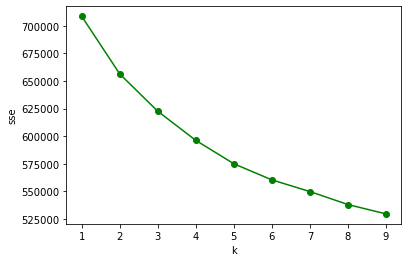

In [105]:
x=range(1,10)
plt.xlabel("k")
plt.ylabel("sse")
plt.plot(x,sse,"go-")
plt.show()

In [122]:
km = KMeans(n_clusters=4).fit(df1)
df1['cluster'] = km.labels_

In [123]:
df1.head()

,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,current_sub_TF,payment_period,cancel_date,account_creation_month,package_type_economy,package_type_enhanced,...,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001,cluster
0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.909091,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.909091,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.181818,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [124]:
df1.groupby("cluster").count()

,weekly_consumption_hour,age,male_TF,initial_credit_card_declined,current_sub_TF,payment_period,cancel_date,account_creation_month,package_type_economy,package_type_enhanced,...,join_fee_0.2569,join_fee_0.2936,join_fee_0.3303,join_fee_0.36700000000000005,join_fee_0.4037,join_fee_0.5872,join_fee_0.6239,join_fee_0.6606,join_fee_0.6973,join_fee_0.7340000000000001
cluster,,,,,,,,,,,,,,,,,,,,,
0,47671,47671,47671,47671,47671,47671,47671,47671,47671,47671,...,47671,47671,47671,47671,47671,47671,47671,47671,47671,47671
1,39139,39139,39139,39139,39139,39139,39139,39139,39139,39139,...,39139,39139,39139,39139,39139,39139,39139,39139,39139,39139
2,33669,33669,33669,33669,33669,33669,33669,33669,33669,33669,...,33669,33669,33669,33669,33669,33669,33669,33669,33669,33669
3,22977,22977,22977,22977,22977,22977,22977,22977,22977,22977,...,22977,22977,22977,22977,22977,22977,22977,22977,22977,22977


In [127]:
data = pd.read_csv("data_clean.csv")

In [128]:
data.loc[(data["cancel_date"].isnull()== False),'cancel_date'] = 1
data.loc[(data["cancel_date"].isnull()== True),'cancel_date'] = 0
data.loc[(data["last_payment"].isnull()== False),'last_payment'] = 1
data.loc[(data["last_payment"].isnull()== True),'last_payment'] = 0
data.loc[(data["next_payment"].isnull()== False),'next_payment'] = 1
data.loc[(data["next_payment"].isnull()== True),'next_payment'] = 0

In [129]:
sub_df = df1["cluster"]
data = data.join(sub_df)
data.to_csv('problem1.csv')